In [ ]:
from yugiquery import *
header('Sets')

<div align='center'>
    <br>
    <!-- Pre Style needed to fix HTML formatting -->
    <pre style="line-height: var(--jp-code-line-height); font-family: var(--jp-code-font-family)">
    ██    ██ ██    ██  ██████  ██  ██████  ██    ██ ███████ ██████  ██    ██ 
     ██  ██  ██    ██ ██       ██ ██    ██ ██    ██ ██      ██   ██  ██  ██  
      ████   ██    ██ ██   ███ ██ ██    ██ ██    ██ █████   ██████    ████   
       ██    ██    ██ ██    ██ ██ ██ ▄▄ ██ ██    ██ ██      ██   ██    ██    
       ██     ██████   ██████  ██  ██████   ██████  ███████ ██   ██    ██    
                                      ▀▀                                     
    </pre>
</div>
<div align='right'>
    Sets - Execution started 26/01/2023 20:27 UTC <br>
    By <b>Guilherme Ruiz</b>
</div>

---

Table of Contents
=================

*   [1  Data aquisition](#Data-aquisition)
    *   [1.1  Fetch set lists](#Fetch-set-lists)
    *   [1.2  Fetch set properties](#Fetch-set-properties)
    *   [1.3  Merge data](#Merge-data)
    *   [1.4  Save data](#Save-data)
*   [3  Check changes](#Check-changes)
    *   [3.1  Load previous data](#Load-previous-data)
    *   [3.2  Generate changelog](#Generate-changelog)
*   [4  Data visualization](#Data-visualization)
    *   [4.1  Full data](#Full-data)
    *   [4.2  Set](#Set)
    *   [4.3  Card number](#Card-number)
    *   [4.4  Name](#Name)
    *   [4.5  Rarity](#Rarity)
        *   [4.5.1  By unique](#By-unique)
        *   [4.5.2  By combination](#By-combination)
    *   [4.6  Print](#Print)
    *   [4.7  Quantity](#Quantity)
    *   [4.8  Region](#Region)
    *   [4.9  Cover card](#Cover-card)
    *   [4.10  Series](#Series)
    *   [4.11  Set type](#Set-type)
    *   [4.12  Release](#Release)
        *   [4.12.1  By year](#By-year)
        *   [4.12.2  By month](#By-month)
        *   [4.12.3  By day](#By-day)
        *   [4.12.4  By region](#By-region)
        *   [4.12.5  By series](#By-series)
        *   [4.12.6  By set type](#By-set-type)
*   [5  Debug](#Debug)
    *   [5.1  Has nan name/number](#Has-nan-name/number)
    *   [5.2  Has nan rarity](#Has-nan-rarity)
    *   [5.3  Has quantity as print](#Has-quantity-as-print)
    *   [5.4  Has nan release](#Has-nan-release)
    *   [5.5  Has print as rarity](#Has-print-as-rarity)
    *   [5.6  Merge failed](#Merge-failed)
*   [6  Epilogue](#Epilogue)
    *   [6.1  HTML export](#HTML-export)
<!-- *   [6.2  Git](#Git) -->

# Data aquisition

## Fetch set lists

In [ ]:
# Timestamp
timestamp = pd.Timestamp.now()

all_set_lists_df = fetch_all_set_lists()

  0%|          | 0/80 [00:00<?, ?it/s]

4120 set lists received - 76 errors


## Fetch set properties

In [ ]:
# List of sets to ask
sets = all_set_lists_df['Set'].unique()  
set_info_df = fetch_set_info(sets)

  0%|          | 0/96 [00:00<?, ?it/s]

1430 set properties received - 3 errors


## Merge data

In [ ]:
# Add properties to set lists
all_set_lists_df = merge_set_info(all_set_lists_df,set_info_df)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_1320/3819812604.py", line 2, in <module>
    all_set_lists_df = merge_set_info(all_set_lists_df,set_info_df)
  File "/home/jovyan/yugiquery/source/yugiquery.py", line 370, in merge_set_info
    input_df['Release'] = input_df[['Set','Region']].apply(lambda x: input_info_df[regions_dict[x['Region']]+' release date'][x['Set']] if (x['Region'] in regions_dict.keys() and x['Set'] in input_info_df.index) else np.nan, axis = 1)
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/frame.py", line 9565, in apply
    return op.apply().__finalize__(self, method="apply")
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/apply.py", line 746, in apply
    return self.apply_standard()
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/apply.py", line 873, in ap

## Save data

In [ ]:
all_set_lists_df.drop('_merge', axis=1).to_csv(f'../data/all_sets_{int(timestamp.timestamp())}.csv', index = False)
print('Data saved')

# Check changes

## Load previous data

In [ ]:
# Get list of files
files_list = sorted(glob.glob('../data/all_sets_*.csv'), key=os.path.getctime, reverse=True)
# Get second newest file if exist
if len(files_list)>1:
    # Load csv avoiding converting "NA" to NaN and force dtypes to match current df
    previous_df = pd.read_csv(files_list[1], dtype=object, keep_default_na=False, na_values=[''])
    # Correct tuples
    previous_df['Rarity'] = previous_df['Rarity'].dropna().apply(literal_eval)
    previous_df['Cover card'] = previous_df['Cover card'].dropna().apply(literal_eval)
    # Force dtypes to match current df
    previous_df = previous_df.astype(all_set_lists_df[previous_df.columns].dtypes.to_dict())
    print('File loaded')
else:
    previous_df = None
    print('No older files')

## Generate changelog

In [ ]:
if previous_df is None:
    print('Skipped')
else:
    changelog = generate_changelog(previous_df, all_set_lists_df.drop('_merge', axis=1), col = 'Card number')
    if not changelog.empty:
        display(changelog)
        changelog.to_csv(f'../data/sets_changelog_{timestamp.strftime("%Y%m%d")}.csv', index = True)
        print('Changelog saved')

# Data visualization

## Full data

In [5]:
all_set_lists_df

,Set,Card number,Name,Rarity,Print,Quantity,Region
0,Abyss Rising Sneak Peek Participation Card,ABYR-ENSP1,Ignoble Knight of Black Laundsallyn,"(Ultra Rare,)",<NA>,<NA>,EN
1,Ancient Sanctuary promotional cards,AST-KRPR1,Tualatin,"(Secret Rare,)",<NA>,<NA>,KR
2,Ancient Sanctuary promotional cards,AST-KRPR2,Enemy Controller,"(Secret Rare,)",<NA>,<NA>,KR
3,Anniversary Pack,YAP1-KR001,Blue-Eyes White Dragon,"(Ultra Rare,)",<NA>,<NA>,KR
4,Anniversary Pack,YAP1-KR002,Red-Eyes Black Dragon,"(Ultra Rare,)",<NA>,<NA>,KR
...,...,...,...,...,...,...,...
155061,Judge promotional cards,TKN4-EN036,Token,"(Super Rare,)",<NA>,<NA>,EN
155062,Jump Festa 2004 promotional cards,PC3-006,Kycoo the Ghost Destroyer,"(Common, Normal Parallel Rare)",<NA>,<NA>,JP
155063,Jump Festa 2004 promotional cards,PC3-007,Bazoo the Soul-Eater,"(Common, Normal Parallel Rare)",<NA>,<NA>,JP
155064,Jump Festa 2005 promotional cards,PC5-JP007,Dark Balter the Terrible,"(Common, Normal Parallel Rare)",<NA>,<NA>,JP


Full data available [here](../data)

## Set

In [ ]:
print('Total number of sets:', all_set_lists_df['Set'].nunique())

In [ ]:
all_set_lists_df.groupby('Set', dropna=False).nunique()

In [ ]:
all_set_lists_df.groupby('Set', dropna=False).nunique().describe()

## Card number

In [ ]:
print('Total number of card numbers:', all_set_lists_df['Card number'].nunique())

In [ ]:
all_set_lists_df.groupby('Card number', dropna=False).nunique()

## Name

In [ ]:
print('Total number of card names:', all_set_lists_df['Name'].nunique())

In [ ]:
all_set_lists_df.groupby('Name', dropna=False).nunique()

In [ ]:
all_set_lists_df.groupby('Name', dropna=True).nunique().describe()

## Rarity

In [6]:
print('Total number of rarities:', all_set_lists_df['Rarity'].explode().nunique())

Total number of rarities: 51


### By unique

In [7]:
all_set_lists_df.explode('Rarity').groupby('Rarity', dropna = False).nunique()

,Set,Card number,Name,Print,Quantity,Region
Rarity,,,,,,
10000 Secret Rare,2,7,1,1,0,7
20th Secret Rare,16,135,134,3,0,1
Collector's Rare,6,301,76,2,0,7
Collectors Rare,8,112,112,2,0,1
Common,562,76876,8592,6,3,17
Duel Terminal Normal Parallel Rare,38,1906,511,2,0,7
Duel Terminal Normal Rare Parallel Rare,5,15,15,0,0,1
Duel Terminal Rare Parallel Rare,34,368,141,2,0,2
Duel Terminal Secret Parallel Rare,16,103,55,1,0,1


In [ ]:
all_set_lists_df['Rarity'].explode().value_counts().plot.barh(figsize = (10,20), grid=True)
plt.xscale('log')
plt.show()

### By combination

In [ ]:
all_set_lists_df.groupby('Rarity', dropna = False).nunique()

In [ ]:
all_set_lists_df['Rarity'].value_counts().plot.barh(figsize = (10,40), grid=True)
plt.xscale('log')
plt.show()

## Print

In [8]:
print('Total number of prints:', all_set_lists_df['Print'].nunique())

Total number of prints: 16


In [9]:
all_set_lists_df.groupby('Print', dropna=False).nunique()

,Set,Card number,Name,Rarity,Quantity,Region
Print,,,,,,
American debut,1,3,3,1,0,1
European & Oceanian debut,1,6,6,1,0,1
European debut,12,146,146,5,0,2
Functional errata,1,2,2,1,0,1
New,233,11754,3981,50,3,11
New art,1,4,2,1,0,2
New artwork,10,74,15,5,0,7
New artwork (renamed),1,3,3,1,0,1
North American debut,2,4,4,2,0,2


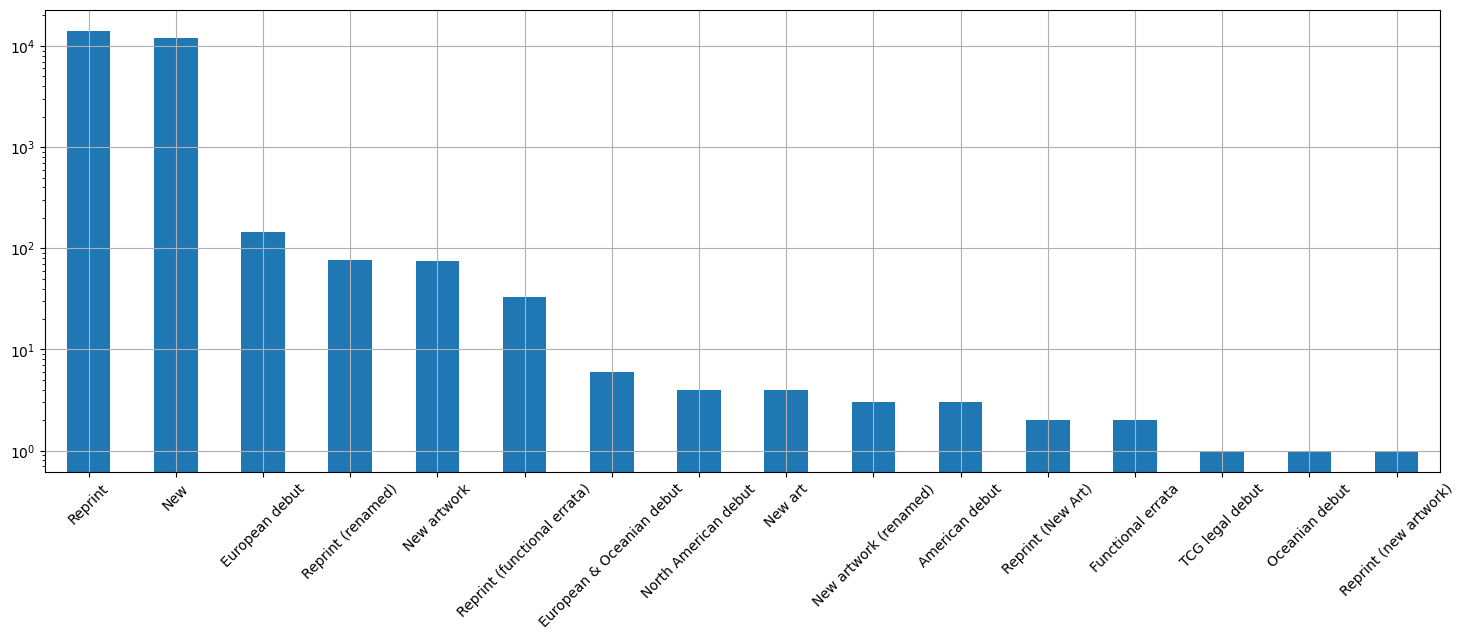

In [10]:
all_set_lists_df['Print'].value_counts().plot.bar(figsize = (18,6), grid=True, rot = 45)
plt.yscale('log')
plt.show()

## Quantity

In [11]:
print('Total number of quantities:', all_set_lists_df['Quantity'].nunique())

Total number of quantities: 3


In [12]:
all_set_lists_df.groupby('Quantity', dropna=False).nunique()

,Set,Card number,Name,Rarity,Print,Region
Quantity,,,,,,
1,66,8760,1167,11,2,11
2,65,839,165,4,2,11
3,8,64,20,1,2,8
<NA>,1370,142334,12503,120,16,17


## Region

In [13]:
print('Total number of regions:', all_set_lists_df['Region'].nunique())

Total number of regions: 17


In [14]:
all_set_lists_df.groupby('Region', dropna=False).nunique()

,Set,Card number,Name,Rarity,Print,Quantity
Region,,,,,,
AE,34,1527,1493,12,0,2
AU,2,100,87,3,0,0
DE,455,20372,10393,45,4,3
EN,658,20184,10480,51,14,3
ES,1,100,100,7,0,0
EU,25,543,456,8,3,0
FC,3,102,87,3,0,0
FR,448,19776,10380,46,4,3
IT,447,20051,10388,46,4,3


In [15]:
all_set_lists_df.groupby('Region', dropna=False).nunique().describe()

,Set,Card number,Name,Rarity,Print,Quantity
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,227.647059,8976.411765,5101.294118,29.000000,3.117647,1.764706
std,254.368812,9324.705056,5022.547446,25.047455,3.461978,1.393261
min,1.000000,100.000000,87.000000,3.000000,0.000000,0.000000
25%,7.000000,300.000000,286.000000,8.000000,0.000000,0.000000
50%,47.000000,1527.000000,1493.000000,12.000000,4.000000,2.000000
75%,447.000000,19111.000000,10388.000000,46.000000,4.000000,3.000000
max,714.000000,20372.000000,11213.000000,90.000000,14.000000,3.000000


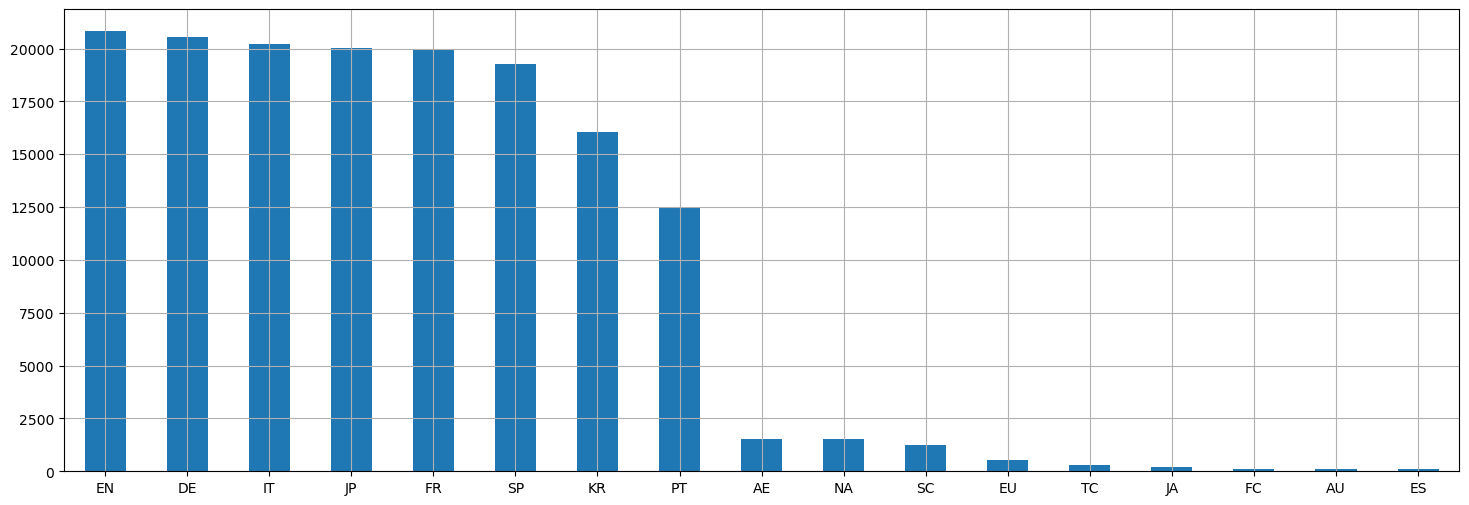

In [16]:
all_set_lists_df['Region'].value_counts().plot.bar(figsize = (18,6), grid=True, rot=0)
plt.show()

## Cover card

In [ ]:
print('Total number of cover cards:', all_set_lists_df['Cover card'].explode('Cover card').nunique())

In [ ]:
all_set_lists_df.explode('Cover card').groupby('Cover card').nunique()

In [ ]:
all_set_lists_df['Cover card'].explode().value_counts().plot.barh(figsize = (10,180), grid=True)
plt.show()

## Series

In [17]:
print('Total number of series:', all_set_lists_df['Series'].nunique())

KeyError: 'Series'

In [ ]:
all_set_lists_df.groupby('Series').nunique()

In [ ]:
all_set_lists_df['Series'].value_counts().plot.barh(figsize = (10,15), grid=True)
plt.show()

## Set type

In [ ]:
print('Total number of set types:', all_set_lists_df['Set type'].nunique())

In [ ]:
all_set_lists_df.groupby('Set type').nunique()

In [ ]:
set_info_df['Set type'].value_counts().plot.barh(figsize = (10,10), grid=True)
plt.show()

## Release

In [ ]:
print('Total number of release dates:', all_set_lists_df['Release'].nunique())

In [ ]:
all_set_lists_df.groupby('Release', dropna=False).nunique()

In [ ]:
set_by_release = pd.DataFrame(all_set_lists_df.groupby('Release', dropna=False)['Set'].nunique())

### By year

In [ ]:
all_set_lists_df.drop('Modification date', axis=1).groupby('Release', dropna=False).nunique().groupby(set_by_release.index.strftime('%Y')).sum()

In [ ]:
rate_plot(set_by_release)

### By month

In [ ]:
set_by_release.groupby(set_by_release.index.strftime('%B')).sum().sort_index(key=lambda x: pd.to_datetime(x, format='%B').month).plot.bar(figsize= (16,8), grid=True, xlabel = 'Release month', rot = 0)
plt.show()

In [ ]:
set_by_release.groupby(set_by_release.index.strftime('%d')).sum().plot.bar(figsize= (16,8), grid=True, xlabel = 'Release day of the month', rot = 0)
plt.show()

### By day

In [ ]:
set_by_release.groupby(set_by_release.index.dayofyear).sum().plot(figsize= (16,8), grid=True, xlabel = 'Release day of the year')
plt.show()

In [ ]:
set_by_release_wd = set_by_release.groupby(set_by_release.index.weekday).sum()
set_by_release_wd.index = [calendar.day_name[i] for i in set_by_release_wd.index.astype(int)]
set_by_release_wd.plot.bar(figsize= (16,8), grid=True, xlabel = 'Release day of the week', rot = 0)
plt.show()

### By region

In [ ]:
by_release_region = all_set_lists_df.groupby(['Region','Release']).nunique()
by_release_region

In [ ]:
set_by_release_region = by_release_region['Set'].unstack(0).sort_index().fillna(0).astype(int)
set_by_release_region_y = set_by_release_region.groupby(set_by_release_region.index.strftime('%Y')).sum().T
set_by_release_region_y

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(set_by_release_region_y[set_by_release_region_y>0], annot=True, fmt='g', cmap='viridis', square=True)
plt.show()

In [ ]:
rate_subplots(set_by_release_region, title='Set releases')

### By series

In [ ]:
by_release_series = all_set_lists_df.explode('Series').groupby(['Series','Release']).nunique()
by_release_series

In [ ]:
set_by_release_series = by_release_series['Set'].unstack(0).sort_index().fillna(0).astype(int)
set_by_release_series_y = set_by_release_series.groupby(set_by_release_series.index.strftime('%Y')).sum().T
set_by_release_series_y

In [ ]:
plt.figure(figsize = (20,16))
sns.heatmap(set_by_release_series_y[set_by_release_series_y>0], annot=True, fmt='g', cmap='viridis', square=True)
plt.show()

In [ ]:
rate_subplots(set_by_release_series, title='Set releases')

### By set type

In [ ]:
by_release_type = all_set_lists_df.explode('Set type').groupby(['Set type','Release']).nunique()
by_release_type

In [ ]:
set_by_release_type = by_release_type['Set'].unstack(0).sort_index().fillna(0).astype(int)
set_by_release_type_y = set_by_release_type.groupby(set_by_release_type.index.strftime('%Y')).sum().T
set_by_release_type_y

In [ ]:
plt.figure(figsize = (20,16))
sns.heatmap(set_by_release_type_y[set_by_release_type_y>0], annot=True, fmt='g', cmap='viridis', square=True)
plt.show()

In [ ]:
rate_subplots(set_by_release_type, title='Set releases')

# Debug

This section is used for debugging the extraction of data from MediaWiki query responses

## Has nan name/number

In [18]:
all_set_lists_df[all_set_lists_df['Name'].isna() | all_set_lists_df['Card number'].isna()]

,Set,Card number,Name,Rarity,Print,Quantity,Region
594,Master of Pendulum Structure Deck,<NA>,<NA>,"(Common,)",<NA>,<NA>,DE
740,Premium Pack,<NA>,Time Wizard,"(Secret Rare,)",<NA>,<NA>,JP
741,Premium Pack,<NA>,Exodia the Forbidden One,"(Ultra Rare,)",<NA>,<NA>,JP
742,Premium Pack,<NA>,Dancing Elf,"(Ultra Rare,)",<NA>,<NA>,JP
743,Premium Pack,<NA>,Goddess of Whim,"(Ultra Rare,)",<NA>,<NA>,JP
...,...,...,...,...,...,...,...
143433,EX Starter Box,<NA>,Reverse Trap,"(Common,)",Reprint,1,JP
143434,EX Starter Box,<NA>,Remove Trap,"(Common,)",Reprint,1,JP
143435,EX Starter Box,<NA>,De-Spell,"(Common,)",Reprint,2,JP
143436,EX Starter Box,<NA>,Castle Walls,"(Common,)",Reprint,1,JP


## Has nan rarity

In [19]:
all_set_lists_df.explode('Rarity')[all_set_lists_df.explode('Rarity')['Rarity'].isna()]['Set'].unique()

<StringArray>
[                   'Dark Beginning 1',                    'Dark Beginning 2',
 'Advanced Tournament Pack 2013 Vol.4',      'Advanced Event Pack 2013 Vol.2',
   'The Valuable Book character cards', 'Advanced Tournament Pack 2016 Vol.1',
      'Advanced Event Pack 2014 Vol.1',            'Dark Revelation Volume 2',
 'Advanced Tournament Pack 2013 Vol.3',            'V Jump April 2013 Tokens',
            'Dark Revelation Volume 1',                     'Classic Pack 03',
   'Deck Build Pack: Tactical Masters']
Length: 13, dtype: string

## Has nan release

In [23]:
all_set_lists_df[all_set_lists_df['Release'].isna()]['Set'].unique()

KeyError: 'Release'

## Merge failed

In [ ]:
all_set_lists_df[all_set_lists_df['_merge']=='right_only']

In [ ]:
len(all_set_lists_df[all_set_lists_df['_merge']=='left_only']['Set'].unique())

In [ ]:
all_set_lists_df['Set'].unique()

In [ ]:
all_set_lists_df[all_set_lists_df['Set'].str.contains("Marik")].dropna()

 # Epilogue

In [ ]:
footer()

## HTML export

In [ ]:
# May need to sleep for a few seconds after saving
save_notebook()

In [ ]:
! jupyter nbconvert Sets.ipynb --output-dir='../' --to=HTML --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags='exclude' --TemplateExporter.exclude_input=True --TemplateExporter.exclude_input_prompt=True --TemplateExporter.exclude_output_prompt=True

## Git

In [ ]:
! git add "../*[Ss]ets[._]*"

In [ ]:
! git commit -m {"'Sets update-" + timestamp.strftime("%d%m%Y")+"'"}